# Introduction to Bayes Theorem

We can easily derieve Bayes Theorem from the defintion of conditional probability.

Defintion of Conditional Probability: The conditional probability of event $A$ given event $B$, denoted $P(A|B)$ is defined as

$$
P(A|B) = \frac{P(A \cap B )}{P(B)}.
$$

Similarily, the conditional probability of B given A is given as 
$$
P(B|A) = \frac{P(B \cap A)}{P(A)}.
$$

Using this we can conclude that the $P(B \cap A)$ is given by
$$
 P(B \cap A)= P(A) P(B|A) = P(B) P(A|B).
$$

Now we can express the $P(B|A)$ as,
$$
P(B|A) = \frac{P(B) P(A|B)}{P(A)}.
$$

If B is partitioned into the events $B_1, B_2, \ldots B_m$, then we can write $P(A)$ as
$$
P(A) = \sum_{i=1}^m P(B_i)P(A|B_i).
$$

Therefore, for each $j = 1,2, \ldots$ the $P(B_j|A)$ is given by
$$
P(B_j|A) = \frac{P(B_j) P(A|B_j)}{\sum_{i=1}^m P(B_i)P(A|B_i)}.
$$


## Example Problem
Suppose A disease afflicts 0.1% individuals in a population. A test has been developed for this disease. An idividual with the disease will test positive for the disease 99% of the time, and an individual without the disease will test postive 1% of time. Suppose an individual is selected at random for this disease and tested. The test shows a positive result. What is the probability that this individual actually has the disease?

Let D be the event that the selected person has the disease.
Let A be the event that the selected person tests positive for the disease.

From the the problem we can deduce that $P(D) = 0.001$, $P(A|D) = 0.99$, and $P(A|D^C) = 0.01$. Since $P(D) = 0.001)$ we can conclude that $P(D^C) = 1-P(D) = 0.999)$. 

Therefore, 
$$
P(D|A) = \frac{P(D)P(A|D)}{P(D)P(A|D) + P(D^C)P(A|D^C)} = \frac{0.001*0.99}{0.001*0.99 + 0.999*0.01} \approx 0.0902.
$$

# Bernoulli Trials
A Bernoulli trial is trial in which there is exactly two possible outcomes, "success" and "failure". Defining the random variable, $X$ as $1$ is the Bernoulli trial is a "success" and $0$ if the Bernoulli trial is a "failure", the probability mass function of a bernoulli random variable is given by 

$$
f(x|\theta) = \theta^x (1-\theta)^{1-x} \hspace{5mm} \mbox{for} \hspace{3mm} x \in \{0,1\}.
$$

Alternatively, $f(x|\theta)$ can also be expressed as
$$
f(x|\theta) = \begin{cases} 
      \theta & \textrm{ for $x = 1$} \\
      1 - \theta & \textrm{ for $x = 0$ } \\
   \end{cases}.
$$

## Flipping the Patriot's Superbowl Coin
Suppose the Patriot's are accused of rigging a coin, and we are tasked with investigating the matter. 

Let's define the Bernoulli random variable $X$ as 
$$
X = \begin{cases} 
      1 & \textrm{if the coin shows heads} \\
      0 & \textrm{if the coin shows tails } \\
   \end{cases}.
$$

Suppose we flip the coin $n$ times and define the trials, $X_1, X_2, \ldots, X_n$. We are interested estimating $\theta$.

### Generate the data

In [3]:
import numpy as np
#Define parameter and sample size
theta , n = 0.5, 10

#Generate Data
x = np.random.binomial(1, theta, n)

### Define the prior
Let's define the prior, $\pi(\theta)$ using a beta distribution.
$$
\pi(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1} (1-\theta)^{\beta - 1}
$$

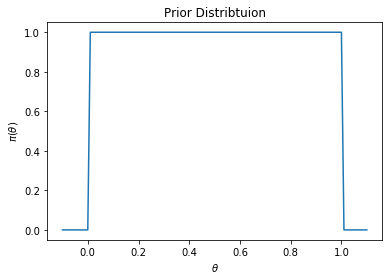

In [5]:
#Define hyperparameters
prior_alpha, prior_beta = 1,1

import matplotlib.pyplot as plt
from scipy.stats import beta

xgrid = np.arange(-0.1,1.1,0.01)
#Evaluate the prior over the grid
prior_of_xgrid = beta.pdf(xgrid, a = prior_alpha, b = prior_beta)

#Plot the prior distribution
plt.plot(xgrid, prior_of_xgrid)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta)$')
plt.title("Prior Distribtuion")
plt.show()


### Define the Likelihood
The likelihood of $\theta$ is the function $L(\theta)$ given by
$$
L(\theta|x) = \prod_{i = 1}^n f(x_i | \theta).
$$

In this case the likelihood is given by
$$
L(\theta) = \prod_{i=1}^n f(x_i|\theta) = \theta^{x_i}(1-\theta)^{1-x_i}
$$

$$
= \theta^{\sum_{i=1}^n x_i}\hspace{2mm} (1-\theta)^{n - \sum_{i=1}^n x_i}.
$$

### Find the posterior
We can find the posterior distribution
$$
\pi(\theta | x) \propto L(\theta|x) \pi(\theta) \propto \theta^{\sum_{i=1}^n x_i}\hspace{2mm} (1-\theta)^{n - \sum_{i=1}^n x_i} \hspace{2mm}\theta^{\alpha - 1} (1-\theta)^{\beta - 1}
$$

$$
\theta^{\alpha + \sum_{i=1}^n x_i - 1}\hspace{2mm} (1-\theta)^{\beta + n - \sum_{i=1}^n x_i -1} 
\sim Beta (\alpha + \sum_{i=1}^n x_i, \beta + n - \sum_{i=1}^n x_i)
$$

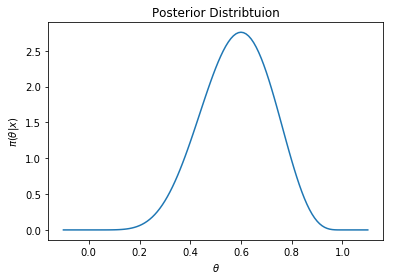

In [6]:
#Define Posterior hyperparameters
posterior_alpha = prior_alpha + x.sum()
posterior_beta = prior_beta + n - x.sum()

#Evaluate the postior over the grid
posterior_of_xgrid = beta.pdf(xgrid, a = posterior_alpha, b = posterior_beta)
#Plot the posterior
plt.plot(xgrid, posterior_of_xgrid)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta | x)$')
plt.title("Posterior Distribtuion")
plt.show()
